<a href="https://colab.research.google.com/github/shainaboover/Meteorite_Landings/blob/master/DSPT7_Build_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install and import libraries##

In [1]:
# run this cell first, then restart runtime
!pip install matplotlib==3.0.0
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756023 sha256=340428ebe879431de197d6dabe3d84c832b8a6b6bff9e0735dfc60e893d4403f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ea4l4wdp/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [2]:
import os.path
import seaborn as sns
import matplotlib.font_manager 
from scipy.stats import ttest_1samp, ttest_ind
from IPython.core.display import HTML 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read in and clean data ##

In [3]:
# read in data and take a look 
source_url = 'https://raw.githubusercontent.com/shainaboover/Meteorite_Landings/master/meteorite-landings.csv'
meteor = pd.read_csv(source_url)
print(meteor.shape)
meteor.sample(3)

(45716, 10)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
21783,MacAlpine Hills 02451,14766,Valid,H5,792.90,Found,2002.0,NaN,NaN,NaN
15184,Grove Mountains 052085,46967,Valid,H5,1.38,Found,2006.0,-72.77528,75.34194,"(-72.775280, 75.341940)"
44080,Yamato 981319,37941,Valid,H4,7.73,Found,1998.0,0.00000,0.00000,"(0.000000, 0.000000)"


In [4]:
# check for null values
meteor.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [5]:
# the (0,0) coordinates are not accurate
# it look as though some are in antartica, while some are in africa, or japan
# change them to null values
meteor['GeoLocation'].replace('(0.000000, 0.000000)', np.nan, inplace=True)

In [6]:
# check work
meteor['GeoLocation'].sample(7)

18569                         NaN
27277                         NaN
8390                          NaN
36684                         NaN
7624       (18.703170, 54.286670)
41881     (-71.500000, 35.666670)
23898    (-79.683330, 159.750000)
Name: GeoLocation, dtype: object

In [7]:
# drop the rows that contain null values
meteor = meteor.dropna()
print(meteor.shape)
meteor.sample(7)

(31930, 10)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
41989,Yamato 793345,28694,Valid,H4,8.85,Found,1979.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
4306,Asuka 881315,4024,Valid,LL6,13.40,Found,1988.0,-72.00000,26.00000,"(-72.000000, 26.000000)"
43148,Yamato 86395,29901,Valid,H4,3.20,Found,1986.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
36973,Sayh al Uhaymir 068,23260,Valid,H5,1165.00,Found,2001.0,21.32667,57.17833,"(21.326670, 57.178330)"
40385,Yamato 791172,26521,Valid,L6,5.68,Found,1979.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
42860,Yamato 86106,29612,Valid,H4,6.53,Found,1986.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
40017,Yamato 790788,26137,Valid,LL6,41.37,Found,1979.0,-71.50000,35.66667,"(-71.500000, 35.666670)"


In [8]:
# reset the index
meteor = meteor.reset_index()

## Quick visualizations to explore ##

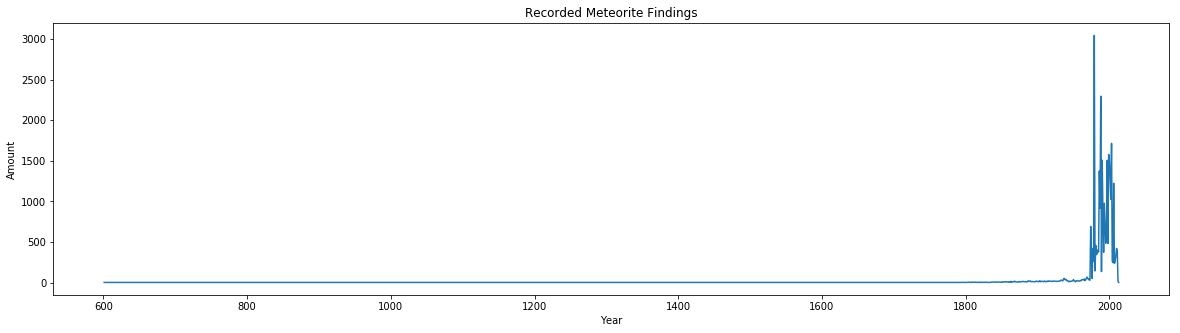

In [9]:
# display frequency of meteorites by year
meteor['year'].value_counts().sort_index(ascending=False).plot(figsize=(20,5), title='Recorded Meteorite Findings')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.savefig('meteor_time');

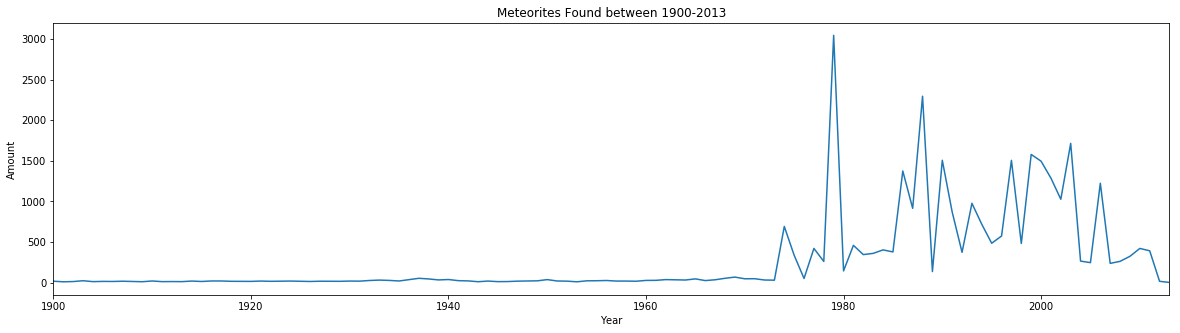

In [10]:
# look at values from 1900 to present
meteor['year'].value_counts().sort_index(ascending=False).plot(figsize=(20,5), xlim=(1900, 2013), title='Meteorites Found between 1900-2013')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.savefig('metor_time_1900');

In [11]:
# take a look at the relationship between year and whether it was found or seen falling
xtab = pd.crosstab(meteor['year'], meteor['fall'])
xtab.head()

fall,Fell,Found
year,,
601.0,0,1
860.0,1,0
1399.0,1,0
1490.0,1,0
1491.0,1,0


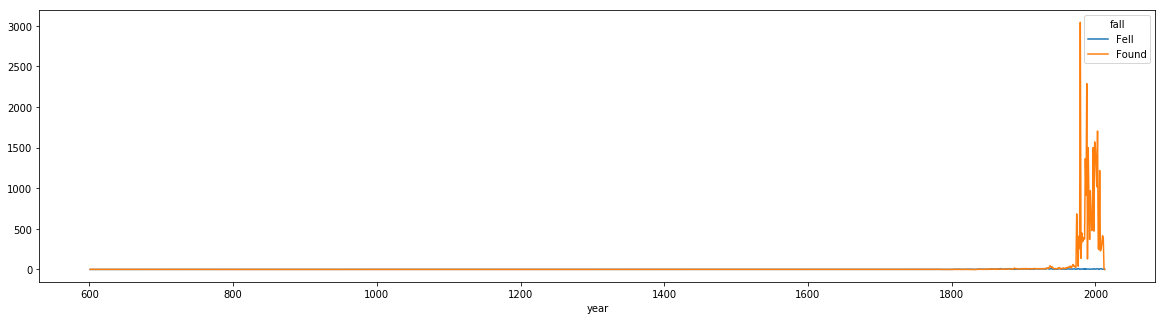

In [12]:
# plot showing found meteroites vs meteroites seen falling
xtab.plot(figsize=(20,5))
plt.savefig('fell_found');

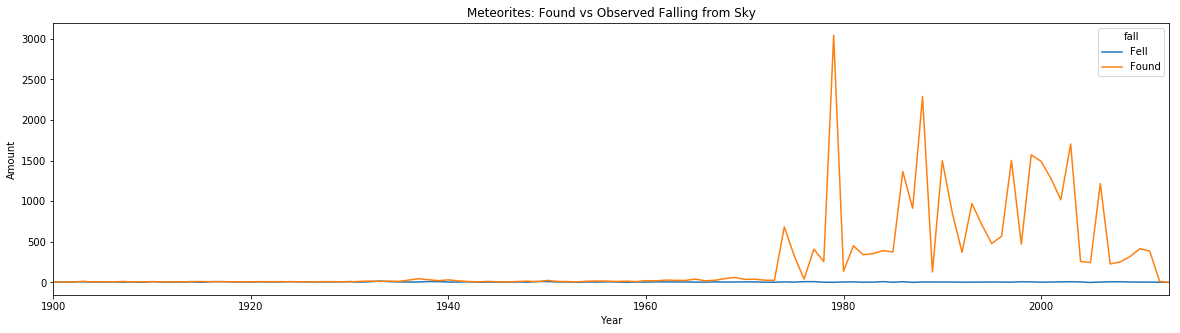

In [13]:
# look at 1900 to present
xtab.plot(figsize=(20,5), xlim=(1900,2013), title='Meteorites: Found vs Observed Falling from Sky')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.savefig('fell_found_1900');

Do meteorites that were seen falling tend to have greater mass than the population?

### Null Hypotheses:###
### Meteroites that were seen falling do not tend to have a mass that is different than the population ###
### Meteorites that were found do not tend to have a mass that is different than the population ###



In [14]:
# isolate meteorites that were found from those seen falling
fall_seen = meteor[meteor['fall']=='Fell']
found = meteor[meteor['fall']=='Found']

In [15]:
# check means
fnd_mean = found['mass'].mean()
fall_mean = fall_seen['mass'].mean()
print('mass mean of seen falling:', fall_mean, '\n', 'mass mean of found:', fnd_mean)

mass mean of seen falling: 47550.7542387218 
 mass mean of found: 17542.34961332866


In [16]:
# get a population mean to compare with
samp_mean = meteor['mass'].mean()
samp_mean

18542.31649467585

In [17]:
# run ttest for fall observed sample
# not a small enough p value to reject null hypothesis
ttest_1samp(fall_seen['mass'], samp_mean)

Ttest_1sampResult(statistic=1.3128323156186639, pvalue=0.18952280732593876)

In [18]:
# run ttest for found sample
# not small enough p value to reject null hypothesis
ttest_1samp(found['mass'], samp_mean)

Ttest_1sampResult(statistic=-0.2562334837022239, pvalue=0.7977722628668465)

Do meteorites found in the last 50 years have a significantly different mass compared to population?

### Null Hypotheses: ###
### Meteorites found in the last 50 years do not tend to have a mass that is different than the population ###
### Meteorites found earlier than 50 yrs ago do not tend to have a mass that is different than the population

In [20]:
# is there a diff in mass between meteorites found in last 50 yrs vs population
# isolate last fifty years
fifty_yr = meteor[meteor['year']>=1965]
fifty_yr['mass'].mean()

1995.810552623674

In [21]:
# isolate meteorites found prior to last 50 yrs
older = meteor[meteor['year']<1965]
older['mass'].mean()

267354.89379206434

In [22]:
# run a ttest for last 50 yrs
# p value of zero, we can reject null hypothesis
ttest_1samp(fifty_yr['mass'], samp_mean)

Ttest_1sampResult(statistic=-60.2778259091556, pvalue=0.0)

In [23]:
# ttest for earlier than 50 yrs
# p value of zero, we can reject null hypothesis
ttest_1samp(older['mass'], samp_mean)

Ttest_1sampResult(statistic=4.06232781595138, pvalue=5.04711151446462e-05)

## A deeper look at how the year of finding a meteorite is related to the mass ##

In [24]:
# bin mass using cut method
meteor['mass_bins'] = pd.cut(meteor['mass'], bins=[0,5,10,50,100,500,1000,5000,10000,50000,6.000000e+07])
meteor['mass_bins'].value_counts().sort_index()

(0.0, 5.0]               6910
(5.0, 10.0]              3294
(10.0, 50.0]             8195
(50.0, 100.0]            2913
(100.0, 500.0]           5409
(500.0, 1000.0]          1431
(1000.0, 5000.0]         2025
(5000.0, 10000.0]         517
(10000.0, 50000.0]        791
(50000.0, 60000000.0]     427
Name: mass_bins, dtype: int64

In [25]:
# bin years using cut method
meteor['year_bins'] = pd.cut(meteor['year'], bins=[600, 1915, 1940, 1965, 1990, 2015])

In [26]:
# crosstab of mass and binned years
xtab2 = pd.crosstab(meteor['mass_bins'], meteor['year_bins'])
xtab2.head()

year_bins,"(600, 1915]","(1915, 1940]","(1940, 1965]","(1965, 1990]","(1990, 2015]"
mass_bins,,,,,
"(0.0, 5.0]",12,3,7,3108,3780
"(5.0, 10.0]",6,3,6,1864,1415
"(10.0, 50.0]",29,12,18,4176,3960
"(50.0, 100.0]",19,13,9,1239,1633
"(100.0, 500.0]",89,58,69,1811,3382


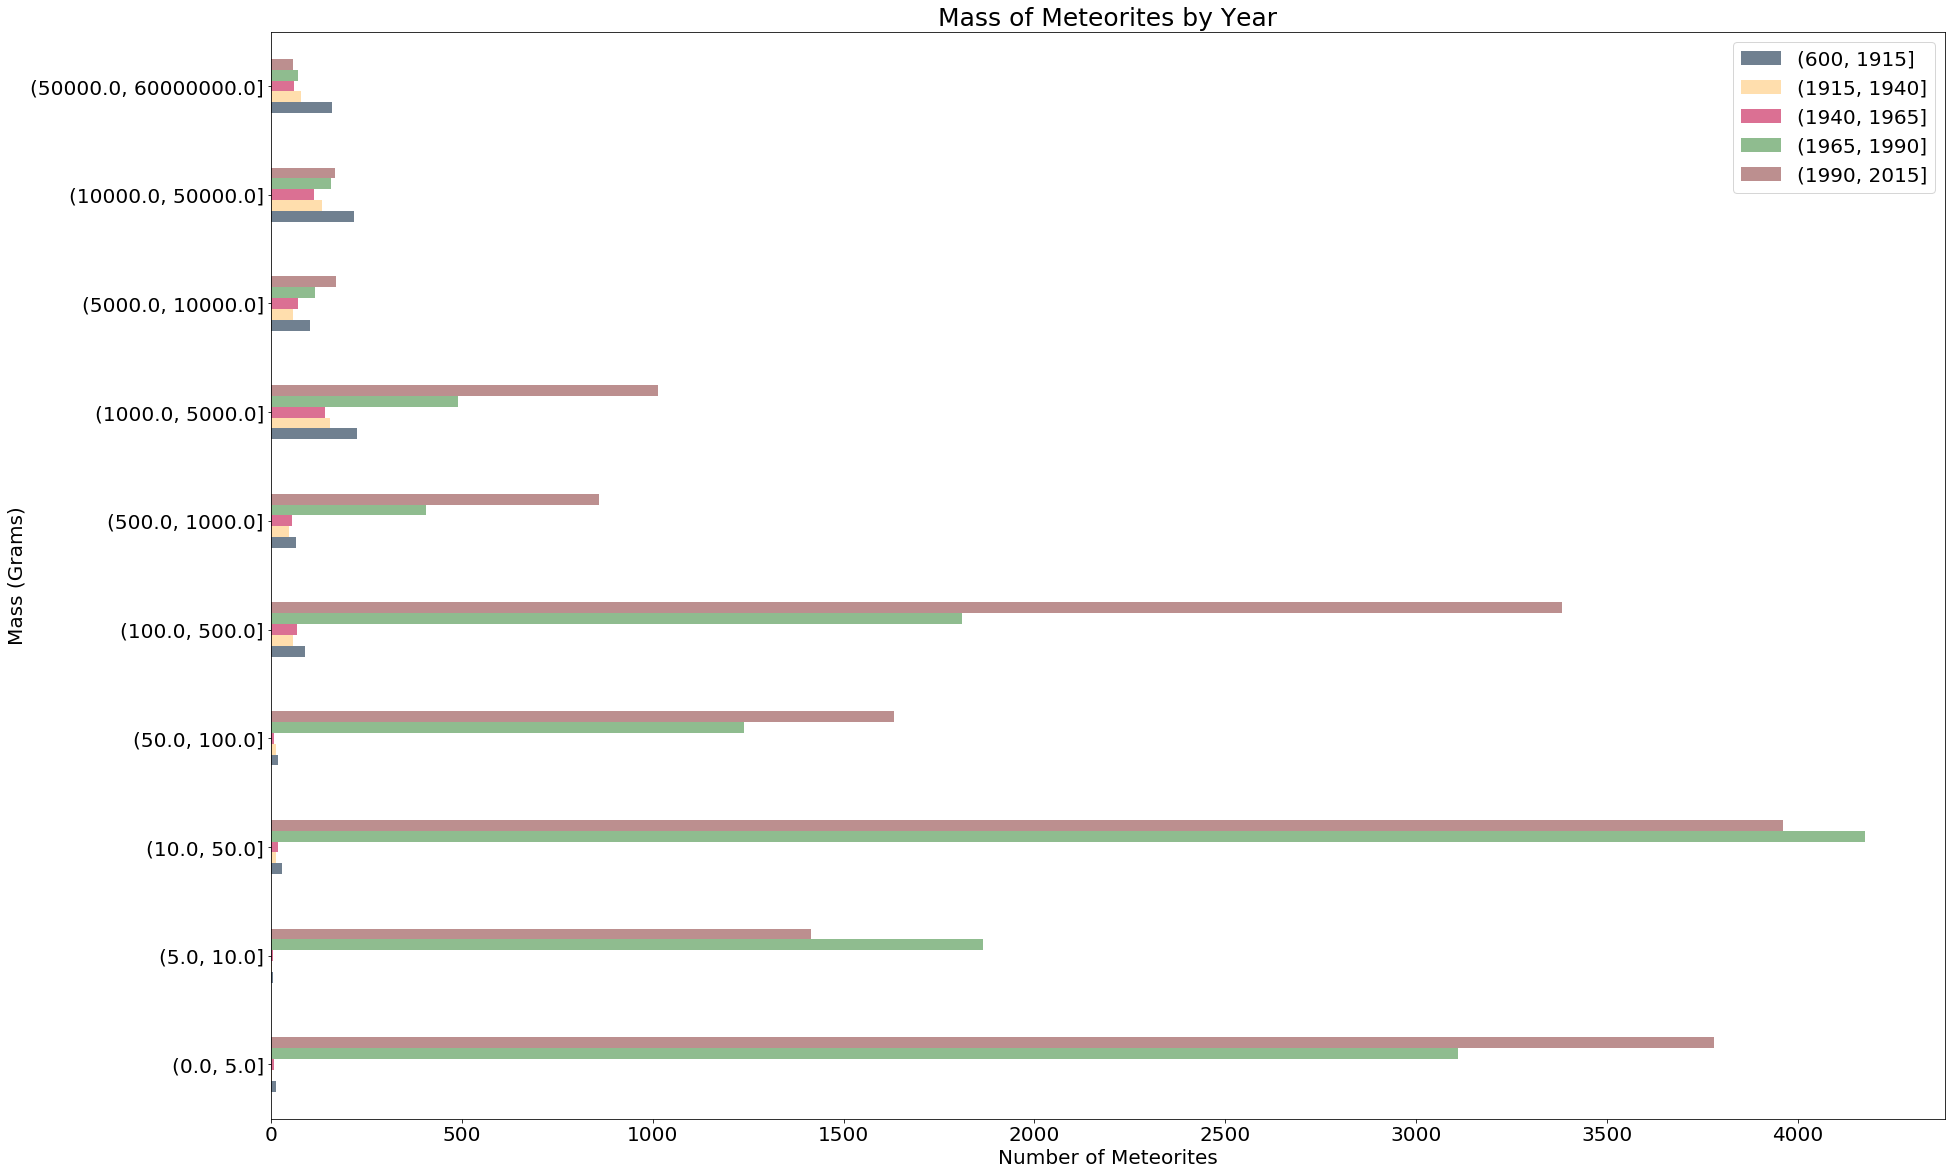

In [27]:
# plot 
xtab2.plot.barh(figsize=(30,20), color=('slategrey', 'navajowhite', 'palevioletred', 'darkseagreen', 'rosybrown'))
plt.title('Mass of Meteorites by Year', fontsize=25)
plt.xlabel('Number of Meteorites', fontsize=20)
plt.ylabel('Mass (Grams)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig('mass_year');

## Map of all meteorite locations ##

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


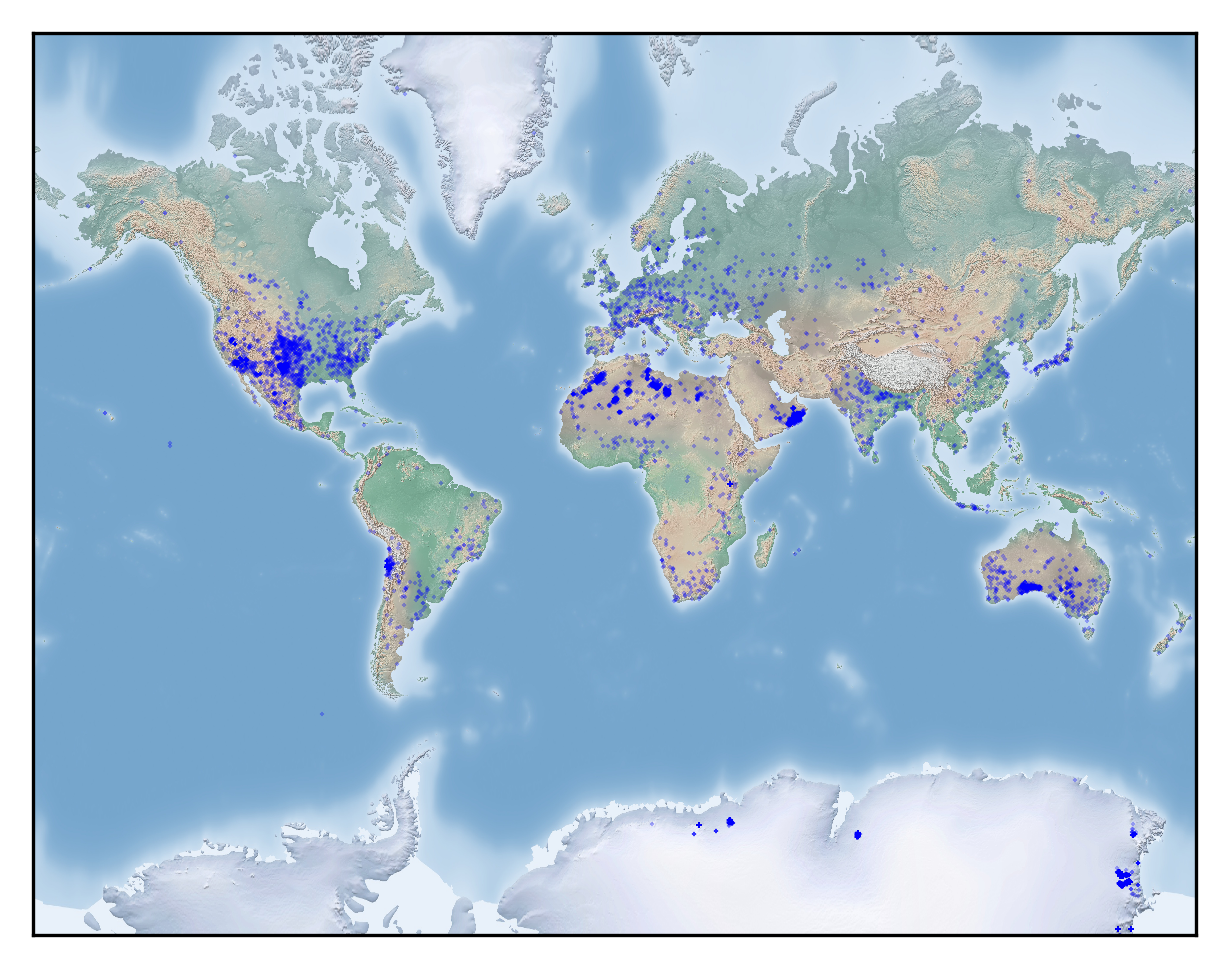

<Figure size 432x288 with 0 Axes>

In [28]:
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
plt.figure(figsize=(5,7), dpi=300)
m.shadedrelief()
lon, lat = np.array(meteor['reclong']), np.array(meteor['reclat'])
x, y = m(lon, lat)
m.plot(x, y, 'b+', markersize=.3, alpha=.3)
plt.show()
plt.savefig('map');

## Which locations are meteorites found the most? ##

In [29]:
# look at top locations with highest concentrations of meteorite findings
# they are all in Antarctica
meteor['GeoLocation'].value_counts().head(10)

(-71.500000, 35.666670)     4760
(-84.000000, 168.000000)    3040
(-72.000000, 26.000000)     1505
(-79.683330, 159.750000)     657
(-76.716670, 159.666670)     637
(-76.183330, 157.166670)     539
(-79.683330, 155.750000)     473
(-84.216670, 160.500000)     263
(-86.366670, -70.000000)     226
(0.000000, 35.666670)        223
Name: GeoLocation, dtype: int64

In [30]:
# make a dataframe to display top 5 concentrations
top_five = pd.DataFrame(index=[1,2,3,4,5])

In [31]:
# assign values to columns
top_five['Location'] = [(-71.500000, 35.666670), (-84.000000, 168.000000), (-72.000000, 26.000000), (-79.683330, 159.750000), (-76.716670, 159.666670)]
top_five['Amount'] = [4760, 3040, 1505, 657, 637]

In [32]:
# check work
top_five

,Location,Amount
1,"(-71.5, 35.66667)",4760
2,"(-84.0, 168.0)",3040
3,"(-72.0, 26.0)",1505
4,"(-79.68333, 159.75)",657
5,"(-76.71667, 159.66667)",637
